In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset=https://www.kaggle.com/loveall/email-campaign-management-for-sme/data

In [3]:
file_dir='dataset/'
train_data=pd.read_csv(file_dir+'Train_psolI3n.csv')

In [4]:
categories=['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type','Time_Email_sent_Category']
for x in categories:
    print(x,set(train_data[x]))
    
print("Email_Status", set(train_data["Email_Status"]))

Email_Type {1, 2}
Email_Source_Type {1, 2}
Customer_Location {nan, 'D', 'A', 'C', 'G', 'B', 'F', 'E'}
Email_Campaign_Type {1, 2, 3}
Time_Email_sent_Category {1, 2, 3}
Email_Status {0, 1, 2}


# hue='Email_Type'

In [ ]:
yy='Subject_Hotness_Score'
xx='Email_Source_Type'
hues='Email_Type'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
yy='Total_Past_Communications'
xx='Email_Source_Type'
hues='Email_Type'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
yy='Word_Count'
xx='Email_Source_Type'
hues='Email_Type'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
yy='Total_Images'
# yy='Word_Count'
xx='Email_Source_Type'
hues='Email_Type'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

# email status

In [ ]:
yy='Subject_Hotness_Score'
hues='Email_Type'
xx='Email_Status'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
yy='Subject_Hotness_Score'
hues='Email_Source_Type'
xx='Email_Status'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
# yy='Subject_Hotness_Score'
yy='Total_Past_Communications'
hues='Email_Type'
xx='Email_Status'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
# yy='Subject_Hotness_Score'
# yy='Total_Past_Communications'
yy='Word_Count'
hues='Email_Type'
xx='Email_Status'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

In [ ]:
# yy='Subject_Hotness_Score'
# yy='Total_Past_Communications'
# yy='Word_Count'
yy='Total_Images'
hues='Email_Type'
xx='Email_Status'
sns.violinplot(x=xx, y=yy, hue=hues, data=train_data, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)
plt.show()

## Covert Categories to OneHot. 

In [5]:
def make_dummies(df, variables):
    for variable in variables:
        dummies = pd.get_dummies(df[variable], prefix = variable)
        df = pd.concat([df, dummies], axis = 1)
        df = df.drop(variable, axis = 1)
    return df

In [6]:
train_data = make_dummies(train_data, categories)

## Missing Value

In [7]:
numeric =['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links','Total_Images']
def fill_na_with(df, numeric_Var_list, value = 0):
    for x in numeric_Var_list:
        print(x,df[x].isnull().sum())
        df[x].fillna(value, inplace=True)
    return df

In [8]:
train_data = fill_na_with(train_data, numeric)

Subject_Hotness_Score 0
Total_Past_Communications 6825
Word_Count 0
Total_Links 2201
Total_Images 1677


## Generate X and y

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from itertools import cycle

In [10]:
X_final = train_data.drop("Email_Status", axis=1).iloc[:,1:]
y_target = pd.Series(train_data["Email_Status"])

# Binarize the output
y = label_binarize(y_target, classes=[0, 1, 2])
n_classes = y.shape[1]

In [11]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
#n_samples, n_features = X_final.shape
#X = np.c_[X_final, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=.5, random_state=0)

In [13]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(GradientBoostingClassifier(max_features=10, n_estimators=500, 
                                 learning_rate=0.05, random_state=random_state))

In [14]:
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=10, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sample...trand.RandomState object at 0x1a0d883828>,
              subsample=1.0, verbose=0, warm_start=False),
          n_jobs=1)

In [15]:
y_score = classifier.decision_function(X_test)

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

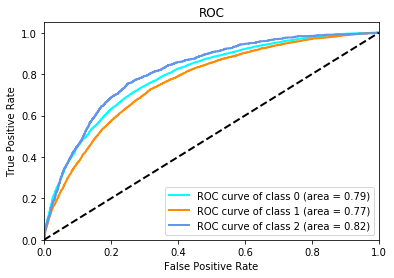

In [26]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()